# Data Preprocessing

### Import CSV data and Overview

In [1]:
import pandas as pd

# CSV file URL
url = 'https://raw.githubusercontent.com/Scherwiin/AI_Darsman/main/Datasets/used_cars.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display information about the DataFrame
df.info()

# Display the first few rows of the DataFrame
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Drop duplicates

In [2]:
df_without_duplicates = df.drop_duplicates()
df_without_duplicates = df_without_duplicates.reset_index(drop=True)
df_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 703.5+ KB


### Drop unimportant columns


In [3]:
unimportant_columns = ['name', 'seller_type']
df = df_without_duplicates.drop(columns=unimportant_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6926 non-null   int64  
 1   selling_price  6926 non-null   int64  
 2   km_driven      6926 non-null   int64  
 3   fuel           6926 non-null   object 
 4   transmission   6926 non-null   object 
 5   owner          6926 non-null   object 
 6   mileage        6718 non-null   object 
 7   engine         6718 non-null   object 
 8   max_power      6721 non-null   object 
 9   torque         6717 non-null   object 
 10  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 595.3+ KB


### Drop rows with null values

In [4]:
df_cleaned = df.dropna()
df = df_cleaned.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   transmission   6717 non-null   object 
 5   owner          6717 non-null   object 
 6   mileage        6717 non-null   object 
 7   engine         6717 non-null   object 
 8   max_power      6717 non-null   object 
 9   torque         6717 non-null   object 
 10  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 577.4+ KB


### Convert object type columns to numeric type


In [5]:
df['mileage'] = df['mileage'].str.replace('kmpl', '').str.replace('km/kg', '').str.strip()
df['mileage'] = df['mileage'].astype(float)

df['engine'] = df['engine'].str.replace('CC', '')
df['engine'] = df['engine'].astype(float)


df['max_power'] = df['max_power'].str.replace('bhp', '')
df['max_power'] = df['max_power'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   transmission   6717 non-null   object 
 5   owner          6717 non-null   object 
 6   mileage        6717 non-null   float64
 7   engine         6717 non-null   float64
 8   max_power      6717 non-null   float64
 9   torque         6717 non-null   object 
 10  seats          6717 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 577.4+ KB


### Encode categorical variables

In [6]:
# Encode fuel, transmission and owner column with one-hot encoding method
categorical_columns_for_oneHot_encoding = ['fuel', 'transmission', 'owner']
df_encoded = pd.get_dummies(df, columns=categorical_columns_for_oneHot_encoding)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        6717 non-null   int64  
 1   selling_price               6717 non-null   int64  
 2   km_driven                   6717 non-null   int64  
 3   mileage                     6717 non-null   float64
 4   engine                      6717 non-null   float64
 5   max_power                   6717 non-null   float64
 6   torque                      6717 non-null   object 
 7   seats                       6717 non-null   float64
 8   fuel_CNG                    6717 non-null   bool   
 9   fuel_Diesel                 6717 non-null   bool   
 10  fuel_LPG                    6717 non-null   bool   
 11  fuel_Petrol                 6717 non-null   bool   
 12  transmission_Automatic      6717 non-null   bool   
 13  transmission_Manual         6717 

### Add new features

In [7]:
import re

df = df_encoded

# Add new feature: horsepower which is calculated by this formula : torque * rpm / 5252

# Remove the comma (,) from the numbers in torque column
df['torque'] = df['torque'].str.replace(',', '')

# Extract numbers from torque column using regex
extracted_numbers = df['torque'].str.extractall(r'(\d+\.\d+|\d+)').unstack()
extracted_numbers = extracted_numbers.astype(float)

# Kgm is multiplied by 9.80665 to be converted to Nm
kgm_indices = df.index[df['torque'].str.contains('kgm')]
extracted_numbers.iloc[kgm_indices, 0] *= 9.80665

# Calculate the mean of the rpm where it is provided in range format
mean_rpm = extracted_numbers.iloc[:, 1:].mean(axis=1, skipna=True)

# Calculate horsepower (Nm is divided by 1.3558 to be converted to ft-lb)
df['horsepower'] = extracted_numbers.iloc[:, 0] * mean_rpm / 5252 / 1.3558

# Drop torque column as we don't need it anymore
df = df.drop(columns=['torque'])

# Drop rows with null value
df_cleaned = df.dropna()
df = df_cleaned.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6713 entries, 0 to 6712
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        6713 non-null   int64  
 1   selling_price               6713 non-null   int64  
 2   km_driven                   6713 non-null   int64  
 3   mileage                     6713 non-null   float64
 4   engine                      6713 non-null   float64
 5   max_power                   6713 non-null   float64
 6   seats                       6713 non-null   float64
 7   fuel_CNG                    6713 non-null   bool   
 8   fuel_Diesel                 6713 non-null   bool   
 9   fuel_LPG                    6713 non-null   bool   
 10  fuel_Petrol                 6713 non-null   bool   
 11  transmission_Automatic      6713 non-null   bool   
 12  transmission_Manual         6713 non-null   bool   
 13  owner_First Owner           6713 

### Filter out outliers

In [8]:
import numpy as np

# Function to delete outliers using the Z-score method
def delete_outliers(column):
  z_scores = np.abs((column - column.mean()) / column.std())
  return column[z_scores <= 2] # Threshold Z-score for outlier detection

# List of columns to delete outliers from
columns = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'horsepower']

# delete outliers from each specified column using Z-score method
df_cleaned = df.copy()
for column in columns:
  df_cleaned[column] = delete_outliers(df_cleaned[column])

# Drop rows with missing values after deleting outliers
df_cleaned = df_cleaned.dropna()
df = df_cleaned.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5453 entries, 0 to 5452
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        5453 non-null   float64
 1   selling_price               5453 non-null   float64
 2   km_driven                   5453 non-null   float64
 3   mileage                     5453 non-null   float64
 4   engine                      5453 non-null   float64
 5   max_power                   5453 non-null   float64
 6   seats                       5453 non-null   float64
 7   fuel_CNG                    5453 non-null   bool   
 8   fuel_Diesel                 5453 non-null   bool   
 9   fuel_LPG                    5453 non-null   bool   
 10  fuel_Petrol                 5453 non-null   bool   
 11  transmission_Automatic      5453 non-null   bool   
 12  transmission_Manual         5453 non-null   bool   
 13  owner_First Owner           5453 

### Data scaling

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define columns to scale
columns_to_scale = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'horsepower']

# Standard Scaling (Z-score normalization)
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

# Labe encode year column
df['year'] = LabelEncoder().fit_transform(df['year'])

df.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,horsepower
0,8,0.007175,2.021702,0.961351,-0.152175,-0.409423,5.0,False,True,False,False,False,True,True,False,False,False,False,-0.322952
1,8,-0.306221,1.366621,0.279286,0.636608,0.869285,5.0,False,True,False,False,False,True,False,False,True,False,False,0.581659
2,0,-1.136720,1.880410,-0.758901,0.633453,-0.236156,5.0,False,False,False,True,False,True,False,False,False,False,True,-0.652606
3,4,-0.874251,1.546447,0.840631,0.314785,0.283644,5.0,False,True,False,False,False,True,True,False,False,False,False,0.538352
4,1,-1.246409,1.366621,-1.241778,0.005582,0.205674,5.0,False,False,False,True,False,True,True,False,False,False,False,0.638153


# Data Visualization

### Year

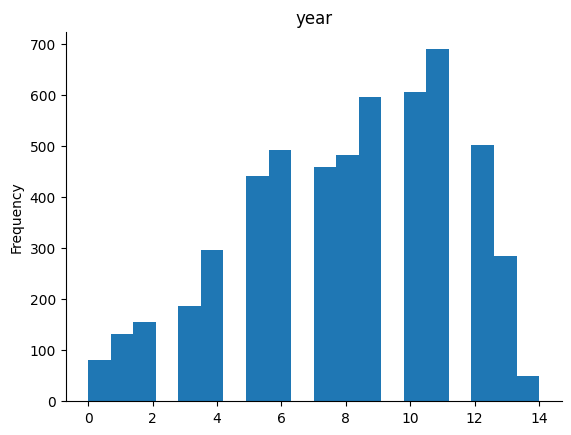

In [10]:
# Showing frequency of years
from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Year vs Selling Price

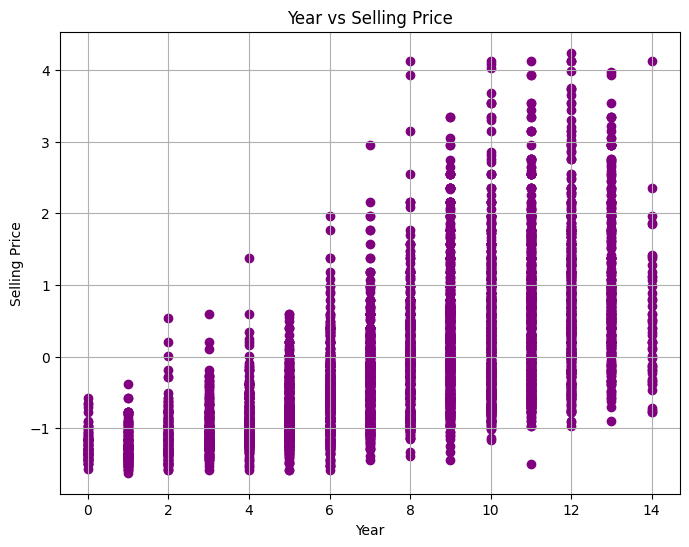

In [11]:
# Plot a scatter plot of year vs selling price
plt.figure(figsize=(8, 6))
plt.scatter(df['year'], df['selling_price'], color='purple')
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

### Correlation

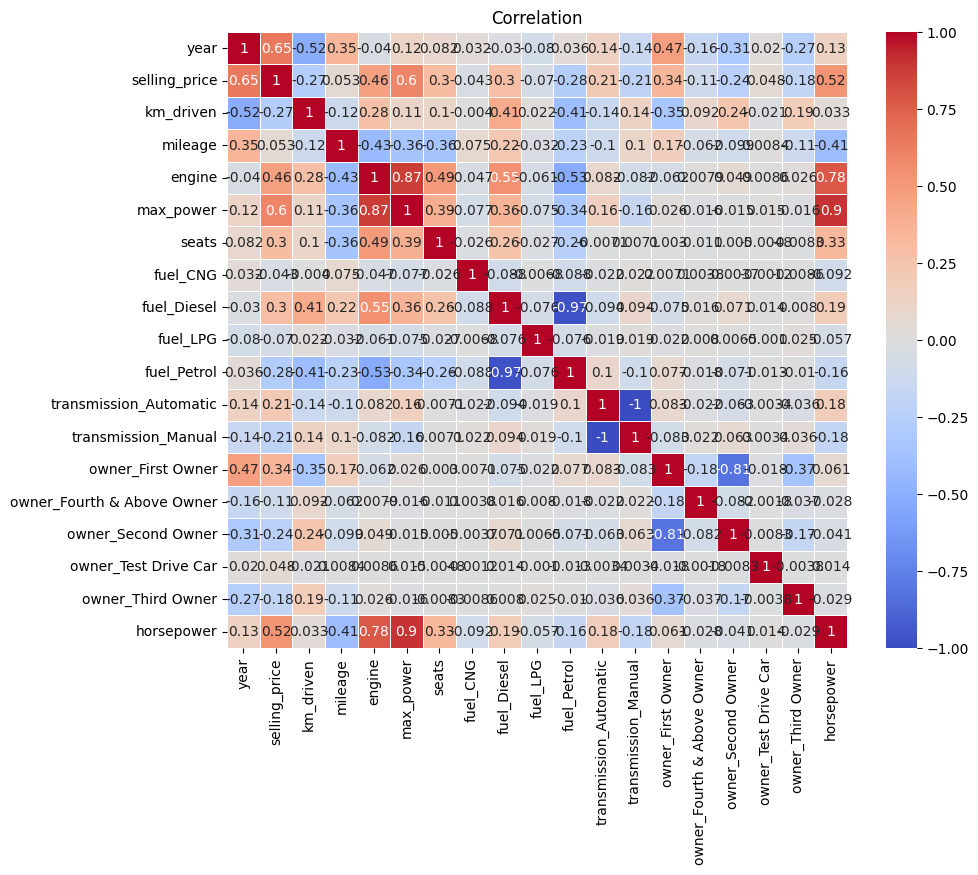

In [12]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation')
plt.show()

### Fuel

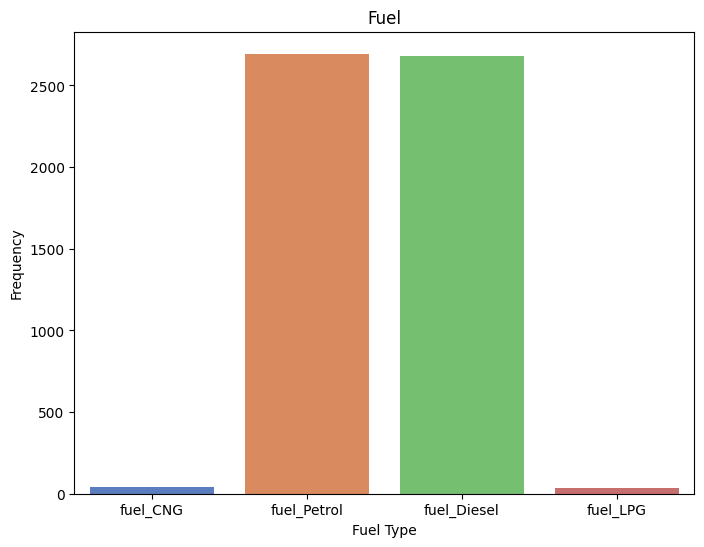

In [13]:
# Select the 4 fuel columns
fuel_columns = df[['fuel_CNG', 'fuel_Petrol', 'fuel_Diesel', 'fuel_LPG']]

# Calculate the frequency of each fuel type
fuel_counts= fuel_columns.sum()

# Plot the frequency of each fuel type
plt.figure(figsize=(8, 6))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, hue=fuel_counts.index, palette='muted')
plt.title('Fuel')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()

### Transmisson

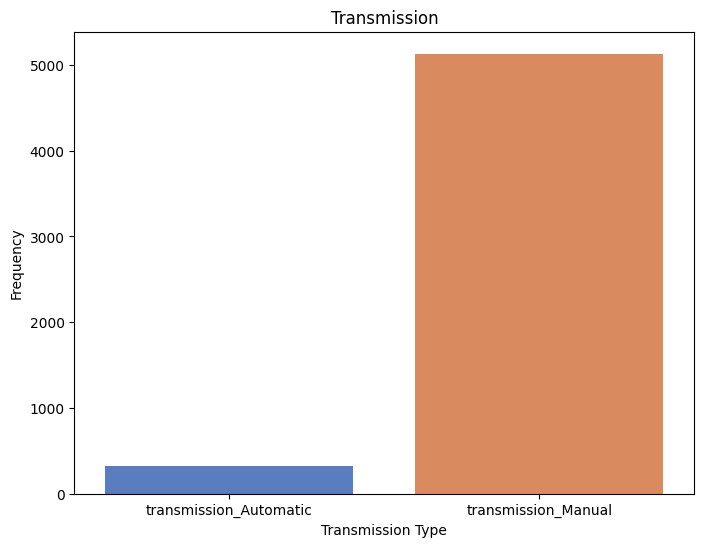

In [14]:
# Select the 2 transmission columns
transmission_columns = df[['transmission_Automatic', 'transmission_Manual']]

# Calculate the frequency of each transmission type
transmission_counts = transmission_columns.sum()

# Plot the frequency of each transmission type
plt.figure(figsize=(8, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, hue=transmission_counts.index, palette='muted')
plt.title('Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.show()

### Owner

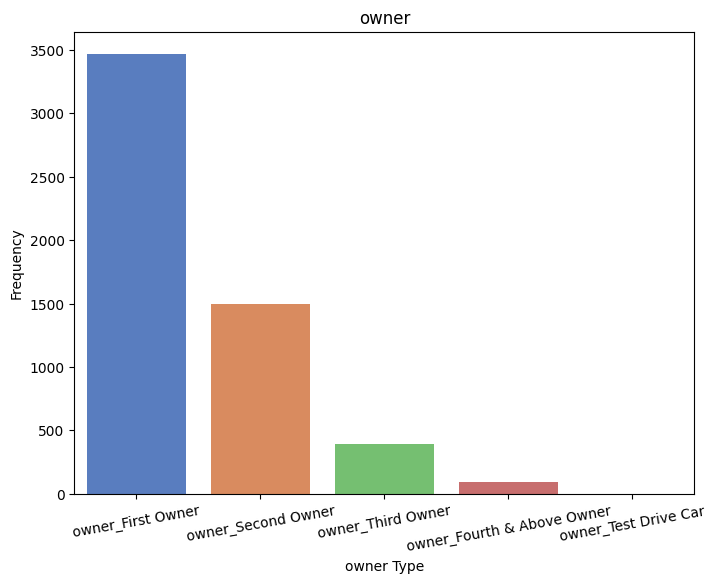

In [15]:
# Select the 4 owner columns
owner_columns = df[['owner_First Owner', 'owner_Second Owner', 'owner_Third Owner', 'owner_Fourth & Above Owner', 'owner_Test Drive Car']]

# Calculate the frequency of each owner type
owner_counts = owner_columns.sum()

# Plot the frequency of each owner type
plt.figure(figsize=(8, 6))
sns.barplot(x=owner_counts.index, y=owner_counts.values, hue=owner_counts.index, palette='muted')
plt.title('owner')
plt.xlabel('owner Type')
plt.ylabel('Frequency')
plt.xticks(rotation=10)
plt.show()

### Seats

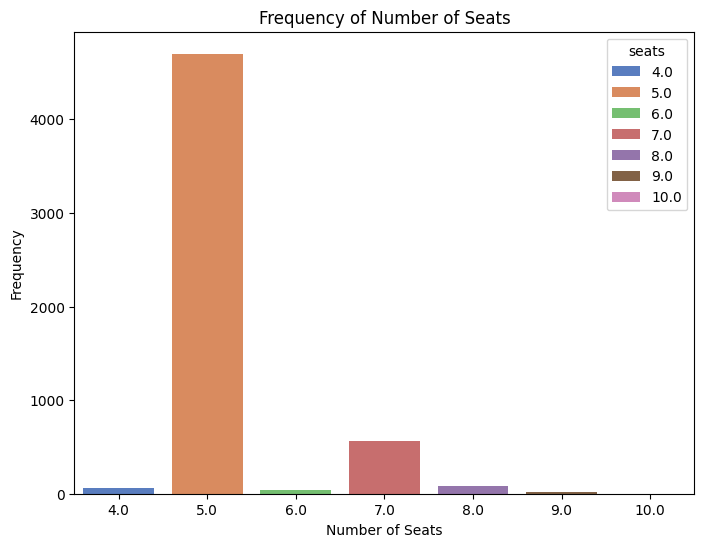

In [16]:
# Plot the frequency of each number of seats
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='seats', hue='seats', palette='muted')
plt.title('Frequency of Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()

### Numerical Features vs Selling price

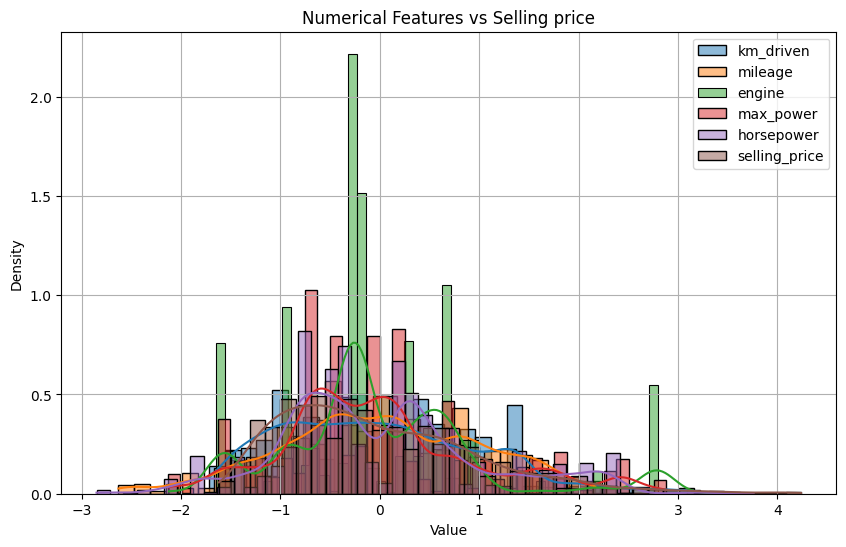

In [17]:
# Plot noraml distribution for each numerical features vs selling_price
plt.figure(figsize=(10, 6))
sns.histplot(df['km_driven'], label='km_driven', kde=True, stat='density')
sns.histplot(df['mileage'], label='mileage', kde=True, stat='density')
sns.histplot(df['engine'], label='engine', kde=True, stat='density')
sns.histplot(df['max_power'], label='max_power', kde=True, stat='density')
sns.histplot(df['horsepower'], label='horsepower', kde=True, stat='density')
sns.histplot(df['selling_price'], label='selling_price', kde=True, stat='density')
plt.title('Numerical Features vs Selling price')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Train and Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the shape of the training and test sets
print("Training set shape", X_train.shape, y_train.shape)
print("Test set shape", X_test.shape, y_test.shape)

Training set shape (4362, 18) (4362,)
Test set shape (1091, 18) (1091,)


# Applying Different Regression Models to Training Set

### Single variable linear regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X_tr = X_train[['year']]
y_tr = y_train
X_te = X_test[['year']]

# Create and train the model using the training set
model = LinearRegression()
model.fit(X_tr, y_tr)

# Make predections on the test set
y_pred_single_r = model.predict(X_te)

### Multivariable linear regression

In [20]:
# Prepare data
X_tr = X_train[['max_power', 'horsepower', 'engine', 'year']]
y_tr = y_train
X_te = X_test[['max_power', 'horsepower', 'engine', 'year']]

# Train the model using training set
model.fit(X_tr, y_tr)

# Make predections on the test set
y_pred_multi_r = model.predict(X_te)

### Polynomial regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Prepare the data
X_tr = X_train[['max_power', 'horsepower', 'engine', 'year']]
y_tr = y_train
X_te = X_test[['max_power', 'horsepower', 'engine', 'year']]


# Create polynomial features up to degree 4 for training set
poly_features = PolynomialFeatures(degree=4)
X_tr_poly = poly_features.fit_transform(X_tr)

# Train the model
model.fit(X_tr_poly, y_tr)

# Transform test data into polynomial features
X_te_poly = poly_features.transform(X_te)

# Make predictions on the test set
y_pred_poly_r = model.predict(X_te_poly)

### Correlation Adjustment techniques (Elastic, Lasso and Ridge Regression)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import Pipeline

# Define the pipeline with scaling and regression
pipe_elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', ElasticNet())
])

pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', Lasso())
])

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', Ridge())
])

# Define hyperparameters grid for each model
param_grid_elastic = {
    'elastic__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'elastic__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

param_grid_lasso = {
    'elastic__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

param_grid_ridge = {
    'elastic__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize GridSearchCv for each model
grid_search_elastic = GridSearchCV(pipe_elastic, param_grid_elastic, cv=5)
grid_search_lasso = GridSearchCV(pipe_lasso, param_grid_lasso, cv=5)
grid_search_ridge = GridSearchCV(pipe_ridge, param_grid_ridge, cv=5)

# Fit the models
grid_search_elastic.fit(X, y)
grid_search_lasso.fit(X, y)
grid_search_ridge.fit(X, y)

# Get best parameters and scores
best_params_elastic = grid_search_elastic.best_params_
best_score_elastic = grid_search_elastic.best_score_

best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

# Models Performance Evaluation on test data using MSE and R-Squared

In [23]:
# Calculate mean squared error and R-squared score on the test set for single variable linear regression
mse = mean_squared_error(y_test, y_pred_single_r)
r2 = r2_score(y_test, y_pred_single_r)
print("Single variable linear regression:")
print("mse:", mse)
print("R-square:", r2)

# Calculate mean squared error and R-squared score on the test set for multivariable linear regression
mse = mean_squared_error(y_test, y_pred_multi_r)
r2 = r2_score(y_test, y_pred_multi_r)
print("\nMultivariable linear regression:")
print("mse:", mse)
print("R-square:", r2)

# Calculate mean squared error and R-squared score on the test set for polynomial regression
mse = mean_squared_error(y_test, y_pred_poly_r)
r2 = r2_score(y_test, y_pred_poly_r)
print("\npolynomial regression:")
print("mse:", mse)
print("R-square:", r2)

# Results for ElasticNet, Lasso and Ridge
print("\nElasticNet - Best parameters:", best_params_elastic)
print("ElasticNet - Best score:", best_score_elastic)
print("\nlasso - Best parameters:", best_params_lasso)
print("lasso - Best score:", best_score_lasso)
print("\nRidge - Best parameters:", best_params_ridge)
print("Ridge - Best score:", best_score_ridge)

Single variable linear regression:
mse: 0.536593936584051
R-square: 0.44400831293691245

Multivariable linear regression:
mse: 0.2801984561860715
R-square: 0.709672432455889

polynomial regression:
mse: 0.18523823266947448
R-square: 0.808065446758261

ElasticNet - Best parameters: {'elastic__alpha': 0.1, 'elastic__l1_ratio': 0.1}
ElasticNet - Best score: 0.7281358992423511

lasso - Best parameters: {'elastic__alpha': 0.1}
lasso - Best score: 0.6942389609266254

Ridge - Best parameters: {'elastic__alpha': 1.0}
Ridge - Best score: 0.7363580699365361


# Better Model Performance Evaluation on test data using Cross Validation
# and Compare the results by showing them on plot


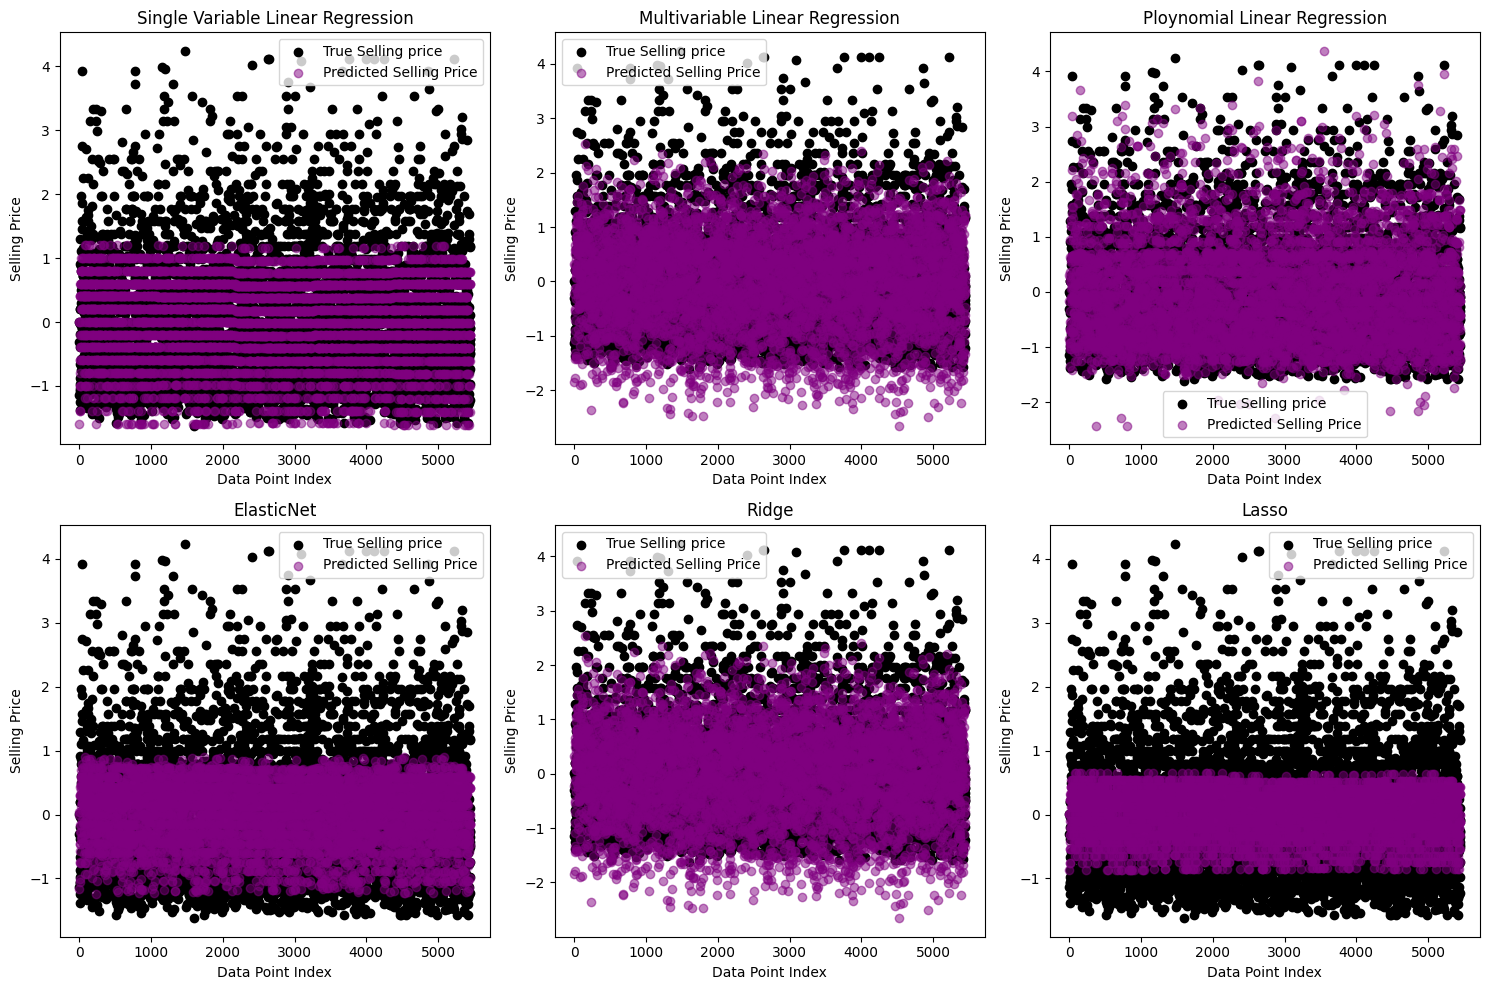

In [24]:
from sklearn.model_selection import cross_val_predict

# Initialize models
models = {
    'Single Variable Linear Regression': LinearRegression(),
    'Multivariable Linear Regression': LinearRegression(),
    'Ploynomial Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Create subplots for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for ax, (model_name, model) in zip(axes, models.items()):
  ax.set_title(model_name)
  ax.set_xlabel('Data Point Index')
  ax.set_ylabel('Selling Price')

  # Plot true data points
  ax.scatter(np.arange(len(y)), y, label='True Selling price', color='black')

  if 'Ploynomial' in model_name:
    poly = PolynomialFeatures(degree=4)
    X_poly = poly.fit_transform(X[['max_power', 'horsepower', 'engine', 'year']])
    y_pred = cross_val_predict(model, X_poly, y, cv=5)
    ax.scatter(np.arange(len(y)), y_pred, label='Predicted Selling Price', color='purple', alpha=0.5)

  elif 'Single Variable' in model_name:
    X_train = X[['year']]
    y_pred = cross_val_predict(model, X_train, y, cv=5)
    ax.scatter(np.arange(len(y)), y_pred, label='Predicted Selling Price', color='purple', alpha=0.5)
  else:
    y_pred = cross_val_predict(model, X, y, cv=5)
    ax.scatter(np.arange(len(y)), y_pred, label='Predicted Selling Price', color='purple', alpha=0.5)

  ax.legend()

plt.tight_layout()
plt.show()